In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Loading Datasets

In [2]:
df1=pd.read_csv("./datasets/dataset1.csv")
df2=pd.read_csv("./datasets/dataset2.csv")
df3=pd.read_csv("./datasets/dataset3.csv")
df4=pd.read_csv("./datasets/dataset4.csv")
df5=pd.read_csv("./datasets/dataset5.csv")
df6=pd.read_csv("./datasets/dataset6.csv")

### K-Means Clustering Algorithm function

In [3]:
# Code taken from reading material in week 3
def k_means(k, data1, noIter=500):
    data = data1.values
    n = len(data)
    index = np.random.randint(0, n, size= (k,1))
    centroids = []
    
    for x in index:
        centroids.extend(data[x][:])
    
    centroids = np.array(centroids)
    
#   Instead of looping through all points and finding the distance from each centroid we can do this    
    distances = cdist(data, centroids ,'euclidean')
    
#   Using the distance to find the closest centroid    
    points_ = [] 
    for distance in distances:
        temp = min(distance)
        res = [i for i, j in enumerate(distance) if j == temp]
        points_.append(res[0])
    
    points = np.array(points_)
#       a shoter way of find the minimum distance from each centroid 
#     points = np.array([np.argmin(i) for i in distances])
    
    for _ in range(noIter): 
        centroids = []
        
        for index in range(k):
            # data[points == index] gives us all the points that are closest to the centroid (labelled as index)
            # .mean() is used to find the mean of the points, axis=0 means along the column, i.e., the points get 
            # added
            temp_cent = data[points==index].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.array(centroids)
        distances = cdist(data, centroids ,'euclidean')

        
        points_=[]
        for distance in distances:
            temp = min(distance)
            res = [i for i, j in enumerate(distance) if j == temp]
            points_.append(res[0])
        points = np.array(points_) 
    return points, centroids


### Funtion for plotting and saving

In [4]:
def plot_scatter(data,points,k,title):
    for i in range(k):
        plt.scatter(data[points == i]['x'],data[points==i]['y'], label = i)
    plt.title(title)
    plt.legend()
#     plt.savefig(title, bbox_inches='tight')
    plt.show()

### Dataset 1

In [43]:
print(df1['class'].unique())

[0 1]


In [44]:
df1['class'].replace({'Class 1': 0,'Class 2': 1},inplace=True)
k=len(df1['class'].unique())
class_array=df1['class'].to_numpy()

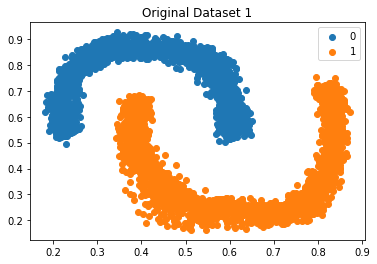

In [47]:
plot_scatter(df1,class_array,k,"Original Dataset 1")

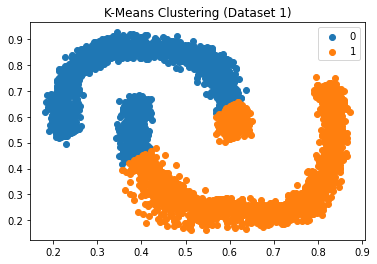

In [50]:
points, centroids = k_means(k, df1[['x', 'y']])
plot_scatter(df1,points,k,"K-Means Clustering (Dataset 1)")

###  Dataset 2

In [29]:
print(df2['class'].unique())

[0 1 2 3 4 5 6 7 8]


In [30]:
k=len(df2['class'].unique())
class_array=df2['class'].to_numpy()

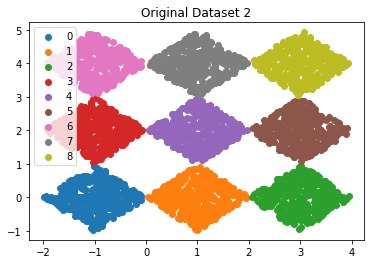

In [31]:
plot_scatter(df2,class_array,k,"Original Dataset 2")

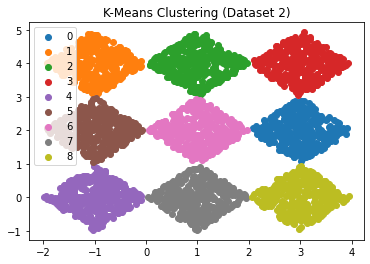

In [33]:
points, centroids = k_means(k, df2[['x', 'y']])
plot_scatter(df2,points,k,"K-Means Clustering (Dataset 2)")

### Dataset 3

In [5]:
print(df3['class'].unique())

['0' 'noise' '1' '2' '3' '4' '5' '6']


In [6]:
# Replacing noise with 7 for convenience
df3['class'].replace({'noise': 7},inplace=True)
k=len(df3['class'].unique())
class_array=df3['class'].to_numpy()
class_array = class_array.astype('int8')

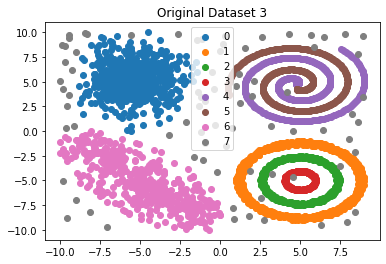

In [7]:
plot_scatter(df3,class_array,k,"Original Dataset 3")

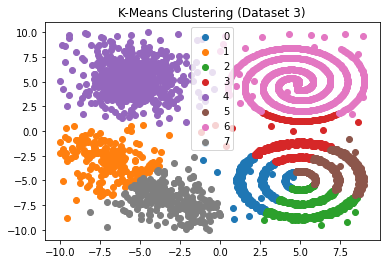

In [8]:
points, centroids = k_means(k, df3[['x', 'y']])
plot_scatter(df3,points,k,"K-Means Clustering (Dataset 3)")

### Dataset 4

In [34]:
print(df4['class'].unique())

[0 1 2 3]


In [35]:
k=len(df4['class'].unique())
class_array=df4['class'].to_numpy()
class_array = class_array.astype('int8')

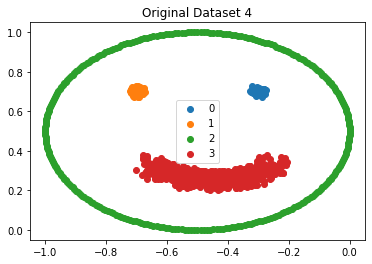

<Figure size 432x288 with 0 Axes>

In [19]:
plot_scatter(df4,class_array,k,"Original Dataset 4")

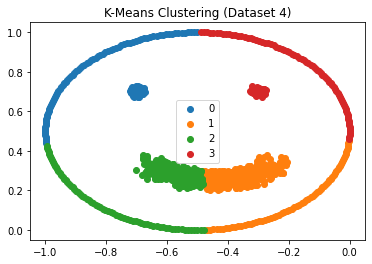

In [36]:
points, centroids = k_means(k, df4[['x', 'y']])
plot_scatter(df4,points,k,"K-Means Clustering (Dataset 4)")

### Dataset 5

In [21]:
print(df5['class'].unique())

[4 5 6 2 1 9 8 3 0 7]


In [22]:
k=len(df5['class'].unique())
class_array=df5['class'].to_numpy()

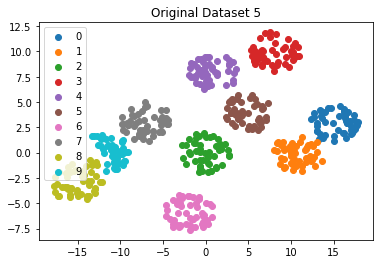

<Figure size 432x288 with 0 Axes>

In [23]:
plot_scatter(df5,class_array,k,"Original Dataset 5")

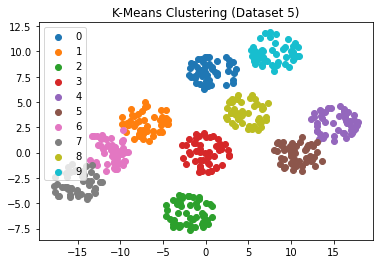

<Figure size 432x288 with 0 Axes>

In [24]:
points, centroids = k_means(k, df5[['x', 'y']])
plot_scatter(df5,points,k,"K-Means Clustering (Dataset 5)")

### Dataset 6

In [39]:
print(df6['class'].unique())

[0 1 2]


In [40]:
k=len(df6['class'].unique())
class_array=df6['class'].to_numpy()

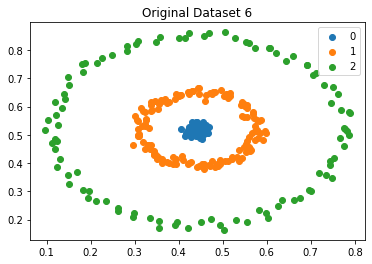

In [41]:
plot_scatter(df6,class_array,k,"Original Dataset 6")

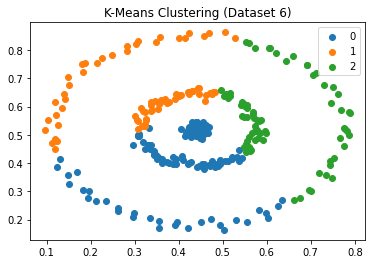

In [42]:
points, centroids = k_means(k, df6[['x', 'y']])
plot_scatter(df6,points,k,"K-Means Clustering (Dataset 6)")